# Prediction using Supervised ML
Predict the percentage of marks of an student based on the number of
study hours

# Author :  KANISHK SHARMA

First, Let's import libraries and the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/student_scores - student_scores.csv')

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.shape

(25, 2)

## Visualization
Let's see the ScatterPlot of Number of Hours Studying VS Marks obtained

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


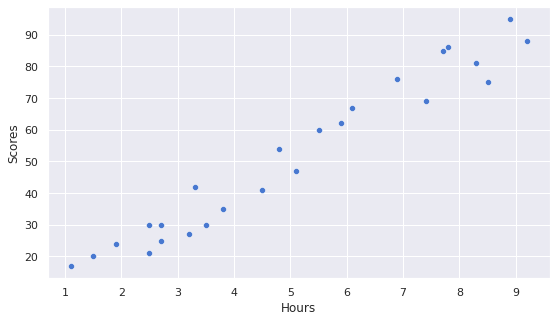

In [ ]:
sns.set(rc={'figure.figsize':(9,5)})
with sns.color_palette('muted'):
  sns.scatterplot(df.Hours,df.Scores)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


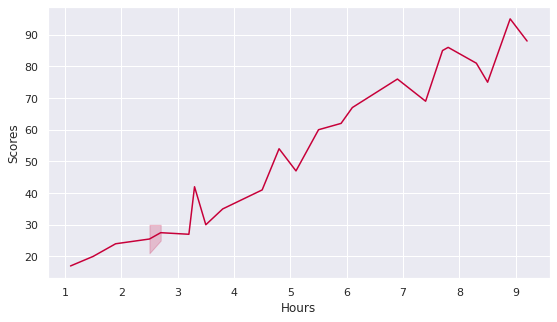

In [ ]:
with sns.color_palette('muted'):
  sns.lineplot(df.Hours,df.Scores,color='#C70039')

#To find the corelation between the number of hours studied and scores obtained
relation = data.corr()
sns.heatmap(relation, annot=True, cmap='summer') 
plt.show()
print('From the graph, we can refer that there is 98% corelation between Hours and Scores')

# Prepare the data

In [ ]:
X = df.iloc[:,:1].values
y = df.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30,random_state=50)

In [ ]:
y_train

array([75, 69, 60, 85, 27, 24, 54, 86, 67, 20, 88, 30, 47, 42, 62, 21, 30])

# Machine Learning

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
model = LinearRegression(normalize=True).fit(X_train,y_train)
y_pred = model.predict(X_test)

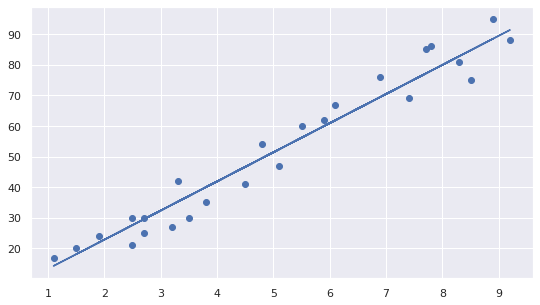

(array([9.52160608]), 3.7843079418921874)

In [ ]:


# Plotting the Linear regression line
line = model.coef_ * X + model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()
model.coef_,model.intercept_


## Validation Score

In [ ]:
print(f'The train score: {model.score(X_train,y_train)}')
print(f'The test score: {model.score(X_test,y_test)}')

The train score: 0.9393866419807256
The test score: 0.9717199573955198


## Test our model for prediction

In [ ]:
# You can also test with your own data

hours = float(input(' Enter the hours of study:- '))
predicted = model.predict([[hours]])
print(" If a student studies for = {}".format(hours),"hours, then his/her predicted score is = {} %".format(predicted))


 Enter the hours of study:- 9.25
 If a student studies for = 9.25 hours, then his/her predicted score is = [93.85916415] %


## Evaluation of the model

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.142939772140698
Mean Squared Error: 21.499902390056103
Root Mean Squared Error: 4.636798722184963
